In [64]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from f_filter_process import call_file, export_dataframe
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import spearmanr
import seaborn as sns

In [69]:
# Function to import files
River_dict = call_file() 

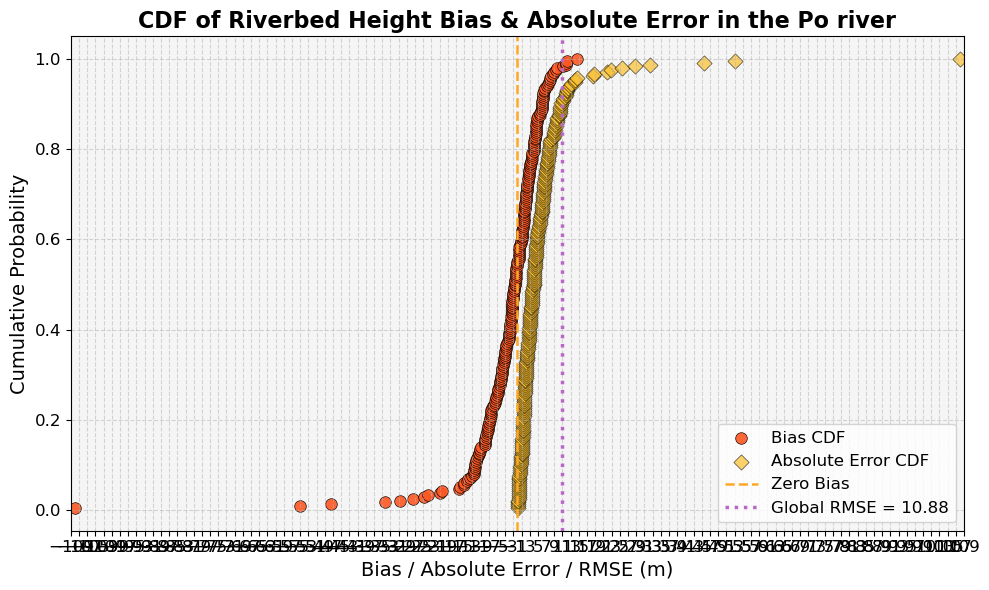

In [10]:
# Calculate bias and absolute error
River_dict['bias'] = River_dict['Riverbed_SWOT'] - River_dict['Riverbed_Bathymetry']
River_dict['abs_error'] = np.abs(River_dict['bias'])

# Global RMSE
rmse = np.sqrt(mean_squared_error(River_dict['Riverbed_Bathymetry'], River_dict['Riverbed_SWOT']))

# CDFs
bias_sorted = np.sort(River_dict['bias'])
cdf_bias = np.arange(1, len(bias_sorted) + 1) / len(bias_sorted)

abs_sorted = np.sort(River_dict['abs_error'])
cdf_abs = np.arange(1, len(abs_sorted) + 1) / len(abs_sorted)

# Custom colors matching the image
color_bias = '#ff5722'    # Bright orange-red
color_abs = '#fbc02d'     # Warm yellow
color_rmse = '#ba68c8'    # Magenta-purple
color_zero = '#ffa726'    # Orange (for zero line)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set a very light gray background
ax.set_facecolor('#f5f5f5')

# Bias CDF - circle markers
ax.scatter(bias_sorted, cdf_bias, color=color_bias, label='Bias CDF',
        s=70, edgecolors='black', linewidth=0.5, marker='o', alpha=0.9)

# Absolute Error CDF - diamond markers, smaller
ax.scatter(abs_sorted, cdf_abs, color=color_abs, label='Absolute Error CDF',
        s=60, edgecolors='black', linewidth=0.5, marker='D', alpha=0.7)

# Vertical lines
ax.axvline(x=0, color=color_zero, linestyle='--', linewidth=1.8, label='Zero Bias')
ax.axvline(x=rmse, color=color_rmse, linestyle=':', linewidth=2.5, label=f'Global RMSE = {rmse:.2f}')

# Axis limits
xmin = np.floor(min(bias_sorted.min(), abs_sorted.min())) - 1
xmax = np.ceil(max(bias_sorted.max(), abs_sorted.max())) + 1
ax.set_xlim(xmin, xmax)
ax.set_xticks(np.arange(xmin, xmax + 2, 2))

# Labels and title
ax.set_xlabel('Bias / Absolute Error / RMSE (m)', fontsize=14)
ax.set_ylabel('Cumulative Probability', fontsize=14)
ax.set_title('CDF of Riverbed Height Bias & Absolute Error in the Po river', fontsize=16, weight='bold')

# Grid and legend
ax.grid(True, which='major', linestyle='--', alpha=0.5)
ax.legend(fontsize=12, loc='lower right', frameon=True, fancybox=True)

# Tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Layout
plt.tight_layout()
plt.show()

/var/folders/tw/gssymbd92cg5hkyl8_d_jbqh0000gn/T/ipykernel_51865/3870292802.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


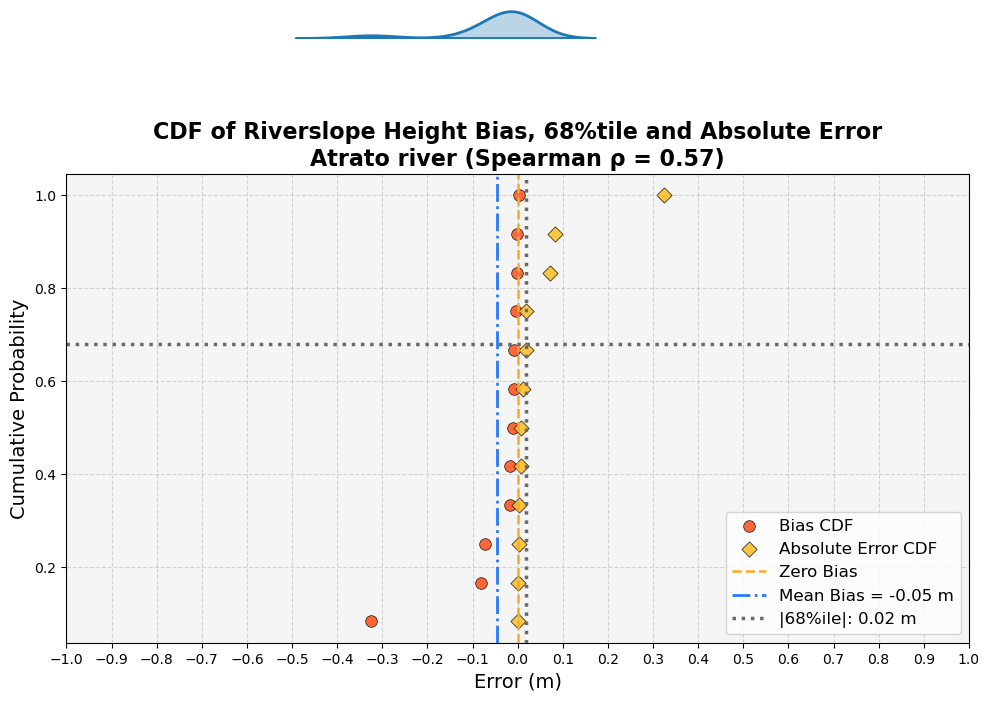

In [72]:
# -- Data setup --
# Calculate bias, absolute error, and mean bias
# -- Data setup --
# Ensure River_dict is defined, with keys 'Riverbed_SWOT' and 'Riverbed_Bathymetry'
River_dict['bias'] = River_dict['Riverbank_SWOT'] - River_dict['Riverbank_Bathymetry']
River_dict['abs_error'] = np.abs(River_dict['bias'])
mean_bias = np.mean(River_dict['bias'])

# Spearman correlation
rho, p_value = spearmanr(River_dict['Riverbank_SWOT'], River_dict['Riverbank_Bathymetry'])

# 68th Percentile Error
p68 = np.percentile(River_dict['abs_error'], 68)

# CDFs
bias_sorted = np.sort(River_dict['bias'])
cdf_bias = np.arange(1, len(bias_sorted) + 1) / len(bias_sorted)

abs_sorted = np.sort(River_dict['abs_error'])
cdf_abs = np.arange(1, len(abs_sorted) + 1) / len(abs_sorted)

# -- Colors --
color_bias = '#ff5722'    # Bright orange-red
color_abs = '#fbc02d'     # Warm yellow
color_p68 = 'dimgrey'     # dim grey
color_zero = '#ffa726'    # Light orange
color_mean = '#2979ff'    # Blue for mean bias

# -- Main Plot --
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f5f5f5')

# Plot CDFs
ax.scatter(
    bias_sorted, cdf_bias,
    color=color_bias, label='Bias CDF',
    s=70, edgecolors='black', linewidth=0.5,
    marker='o', alpha=0.9
)
ax.scatter(
    abs_sorted, cdf_abs,
    color=color_abs, label='Absolute Error CDF',
    s=60, edgecolors='black', linewidth=0.5,
    marker='D', alpha=0.9
)

# Zero Bias line
ax.axvline(
    x=0, color=color_zero, linestyle='--', linewidth=1.8,
    label='Zero Bias'
)

# Mean Bias line
ax.axvline(
    x=mean_bias, color=color_mean, linestyle='-.', linewidth=2,
    label=f'Mean Bias = {mean_bias:.2f} m'
)

# 68th Percentile lines (no intersection marker)
ax.axvline(
    x=p68, color=color_p68, linestyle=':', linewidth=2.5,
    label=f'|68%ile|: {p68:.2f} m'
)
ax.axhline(
    y=0.68, color=color_p68, linestyle=':', linewidth=2.5
)

# Axis limits & ticks
xmin = np.floor(min(bias_sorted.min(), abs_sorted.min())) 
xmax = np.ceil(max(bias_sorted.max(), abs_sorted.max(), p68)) 
ax.set_xlim(xmin, xmax)
ax.set_xticks(np.arange(xmin, xmax + 0.1, 0.1))

# Labels & Title
ax.set_xlabel('Error (m)', fontsize=14)
ax.set_ylabel('Cumulative Probability', fontsize=14)
ax.set_title(
    f'CDF of Riverslope Height Bias, 68%tile and Absolute Error\nAtrato river (Spearman ρ = {rho:.2f})',
    fontsize=16, weight='bold'
)

# Grid & Legend
ax.grid(True, which='major', linestyle='--', alpha=0.5)
ax.legend(fontsize=12, loc='lower right', frameon=True, fancybox=True)

# -- Marginal KDE: Top (Bias Distribution) --
ax_kde = inset_axes(
    ax, width="100%", height="20%", loc='upper center',
    bbox_to_anchor=(0, 1.05, 1, 0.3),
    bbox_transform=ax.transAxes, borderpad=0
)
sns.kdeplot(
    data=River_dict, x='bias', ax=ax_kde,
    fill=True, linewidth=2, alpha=0.3
)
ax_kde.set_xlim(xmin, xmax)
ax_kde.axis('off')

plt.tight_layout()
plt.show()